In [13]:
'''

Carga y muestreo de datos
Temario: Intervenciones de seguirdad vial y los reclamos que se obtuvieron de estas mismas.

'''


'\n\nCarga y muestreo de datos\nTemario: Intervenciones de seguirdad vial y los reclamos que se obtuvieron de estas mismas.\n\n'

In [14]:
#Abstract Dataset
'''
Este dataset muestra los accidentes viales y los reclamos que se produjeron en Buenos Aires desde Enero 2014 hasta Marzo 2022.
Indicando la fecha y la hora exacta donde se produjo  el accidente, el autopista, la altura, la banda  y/o ramal del lugar de dicho accidente, el clima, y el estado de la ruta (ej: seca, mojada) del mismo, la cantidad de lesionados, la cantidad de fallecidos, el tipo de accidente (por ejemplo: choque entre 2 autos, o choque de un camion con una moto, entre otros) y por ultimo cuales fueron los protagonistas (moto, auto, bus, entre otros).
Los relcamos tienen un nro de reclamo, una fecha y un nombre/titulo del reclamo.
Basicamente lo que queremos lograr con estos datos, es realizar un analisis especifico para obtener resultados como por ejemplo: 
    - Cual es el tipo de vehiculo que en mas accidentes participa
    - Cual es la cantidad de fallecidos o de lesionados por un accidente con un vehiculo especifico
    - Cual es la hora donde mas accidentes ocurren
    - Cual es la cantidad de fallecidos / lesionados dependiendo del clima
'''


'\nEste dataset muestra los accidentes viales y los reclamos que se produjeron en Buenos Aires desde Enero 2014 hasta Marzo 2022.\nIndicando la fecha y la hora exacta donde se produjo  el accidente, el autopista, la altura, la banda  y/o ramal del lugar de dicho accidente, el clima, y el estado de la ruta (ej: seca, mojada) del mismo, la cantidad de lesionados, la cantidad de fallecidos, el tipo de accidente (por ejemplo: choque entre 2 autos, o choque de un camion con una moto, entre otros) y por ultimo cuales fueron los protagonistas (moto, auto, bus, entre otros).\nLos relcamos tienen un nro de reclamo, una fecha y un nombre/titulo del reclamo.\nBasicamente lo que queremos lograr con estos datos, es realizar un analisis especifico para obtener resultados como por ejemplo: \n    - Cual es el tipo de vehiculo que en mas accidentes participa\n    - Cual es la cantidad de fallecidos o de lesionados por un accidente con un vehiculo especifico\n    - Cual es la hora donde mas accidentes o

In [62]:
import statsmodels.regression.linear_model as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
import random
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.api import add_constant
import statsmodels.api as sm
import os
import lightgbm as lgb
#%matplotlib inline
#plt.style.use('ggplot')
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import sklearn # Paquete base de ML
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
from sklearn.metrics import confusion_matrix
# Accuracy
from sklearn.metrics import accuracy_score
# Recall
from sklearn.metrics import recall_score
# Precision
from sklearn.metrics import precision_score

%matplotlib inline

In [16]:
filename = 'intervenciones-de-seguridad-vial.csv'
filename2 = 'reclamos-ausa.xlsx'
data = pd.read_table(filename, header=0, sep=';')
data2=pd.read_excel(filename2, header=0)

print('''
            Intervenciones de seguridad vial
    ''')
print(data.shape)
print (data)
print('-'*80)
print('''
            Reclamos AUSA
    ''')
print(data2.shape)
print (data2)

print('-'*80)
totalFallecidos=data['fallecidos'].sum()
print(f'''
        La cantidad total de fallecidos debido a un accidente vial es de: {totalFallecidos}  
    ''')

print('-'*80)

maximaCantMuertos=data['fallecidos'].max()
print(f'''
        La cantidad maxima de fallecidos debido a un accidente vial es de: {maximaCantMuertos}  
    ''')



            Intervenciones de seguridad vial
    
(7579, 15)
          fecha  hora         autopista banda_y_o_ramal    pk  \
0      1/1/2014     1        AU CAMPORA      ASCENDENTE   600   
1      1/1/2014     3     AU DELLEPIANE     DESCENDENTE   600   
2      1/1/2014    22     AU 25 DE MAYO      ASCENDENTE  5900   
3      1/3/2014     7        AU CAMPORA     DESCENDENTE   600   
4      1/3/2014    21  AU PERTIO MORENO     DESCENDENTE  5400   
...         ...   ...               ...             ...   ...   
7574  30/3/2022    12       AV. LUGONES     DESCENDENTE  4500   
7575  30/3/2022    13       AU FRONDIZI     DESCENDENTE  2500   
7576  31/3/2022     8     AU 25 DE MAYO      ASCENDENTE  6600   
7577  31/3/2022    13       AU FRONDIZI      ASCENDENTE  1900   
7578  31/3/2022    17       AV. CANTILO      ASCENDENTE  9700   

     condiciones_meteorologicas superficie_de_la_via  lesionados  fallecidos  \
0                         BUENO                 SECA           1           0 

In [17]:
totalFallecidos=data['fallecidos'].sum()
print(f'''
        La cantidad total de fallecidos debido a un accidente vial es de: {totalFallecidos}  
    ''')

print('-'*80)

maximaCantMuertos=data['fallecidos'].max()
print(f'''
        La cantidad maxima de fallecidos debido a un accidente vial es de: {maximaCantMuertos}  
    ''')

print('-'*80)

media=data['fallecidos'].mean()
mediaAcortada=round(media, 4)
print(f'''
        La media de fallecidos debido a un accidente vial es de: {mediaAcortada}  
    ''')


        La cantidad total de fallecidos debido a un accidente vial es de: 72  
    
--------------------------------------------------------------------------------

        La cantidad maxima de fallecidos debido a un accidente vial es de: 3  
    
--------------------------------------------------------------------------------

        La media de fallecidos debido a un accidente vial es de: 0.0095  
    


In [18]:
df = pd.DataFrame(data, columns = ['fecha','hora','autopista','banda_y_o_ramal','pk','condiciones_meteorologicas','superficie_de_la_via','lesionados','fallecidos','tipo_de_siniestro','moto','liviano','bus','camion', 'tipoDeVehiculo' 
])
df

,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,tipoDeVehiculo
0,1/1/2014,1,AU CAMPORA,ASCENDENTE,600,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,1,0,0,moto
1,1/1/2014,3,AU DELLEPIANE,DESCENDENTE,600,BUENO,SECA,0,0,COLISION CON OBSTACULO FIJO,0,1,0,0,bus
2,1/1/2014,22,AU 25 DE MAYO,ASCENDENTE,5900,BUENO,SECA,8,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0,camion
3,1/3/2014,7,AU CAMPORA,DESCENDENTE,600,BUENO,SECA,0,0,OBSTACULO NO FIJO,0,0,0,1,camion
4,1/3/2014,21,AU PERTIO MORENO,DESCENDENTE,5400,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,2,0,0,camion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7574,30/3/2022,12,AV. LUGONES,DESCENDENTE,4500,BUENO,SECA,1,0,COLISION CON DOS O MAS VEHICULOS,1,1,0,0,moto
7575,30/3/2022,13,AU FRONDIZI,DESCENDENTE,2500,BUENO,SECA,2,0,COLISION CON DOS O MAS VEHICULOS,0,3,0,1,camion
7576,31/3/2022,8,AU 25 DE MAYO,ASCENDENTE,6600,BUENO,SECA,1,0,COLISION CON DOS O MAS VEHICULOS,1,2,0,1,bus
7577,31/3/2022,13,AU FRONDIZI,ASCENDENTE,1900,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,1,1,0,moto


In [19]:
# Elijo los datos a analizar
'''A continuacion se resuelven las hipostesis y los EDA'''

'A continuacion se resuelven las hipostesis y los EDA'

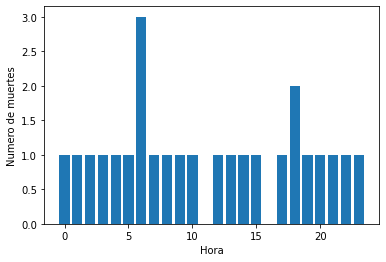

In [20]:

# Variable independiente = hora en la que ocurren los accidentes
# Variable dependiente = fallecidos 

#Cual es la cantidad de fallecidos por hora
plt.bar(df.hora,df.fallecidos)
plt.xlabel('Hora')
plt.ylabel('Numero de muertes')
plt.show()

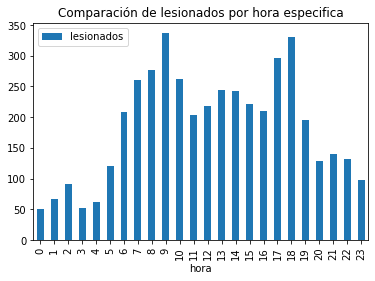

In [21]:
#Cual es la cantidad de lesionados dependiendo del clima
plot=df.groupby('hora')[['lesionados']].sum().plot(kind='bar',
                                            title='Comparación de lesionados por hora especifica')

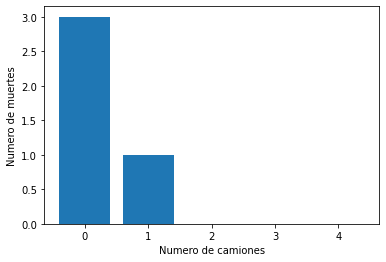

In [22]:
# Elijo los datos a analizar

# Variable independiente = camion 
# Variable dependiente = fallecidos 

#Cual es la cantidad de muertes que manjean camiones
plt.bar(df.camion,df.fallecidos)
plt.xlabel('Numero de camiones')
plt.ylabel('Numero de muertes')
plt.show()


        La cantidad total de autos es de: 9056  
    
--------------------------------------------------------------------------------

        La cantidad total de autos es de: 2847  
    


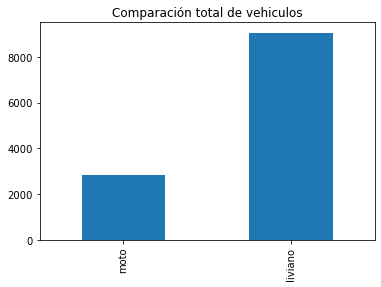

In [23]:
totalAutos=df['liviano'].sum()
print(f'''
        La cantidad total de autos es de: {totalAutos}  
    ''')

print('-'*80)

totalMotos=df['moto'].sum()
print(f'''
        La cantidad total de autos es de: {totalMotos}  
    ''')


#Gráfico de barras de cantidad de transportes
plot = df[['moto','liviano']].sum().plot(kind='bar',
                                            title='Comparación total de vehiculos')

                                            

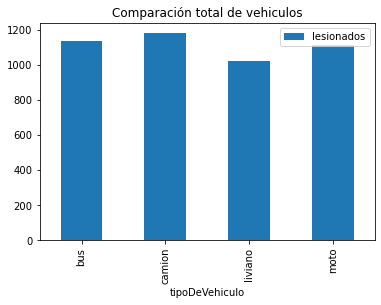

In [24]:

plot=df.groupby('tipoDeVehiculo')[['lesionados']].sum().plot(kind='bar',
                                            title='Comparación total de vehiculos')

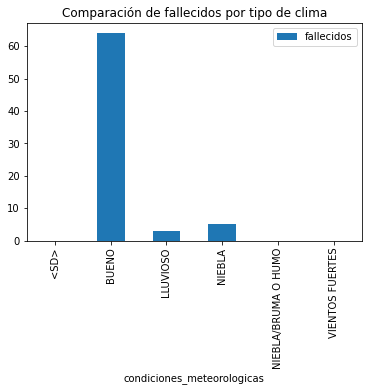

In [25]:
#Cual es la cantidad de fallecidos dependiendo del clima

plot=df.groupby('condiciones_meteorologicas')[['fallecidos']].sum().plot(kind='bar',
                                            title='Comparación de fallecidos por tipo de clima')

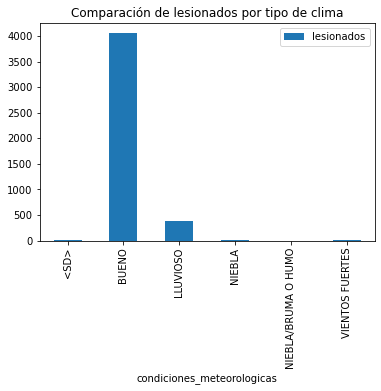

In [26]:
#Cual es la cantidad de lesionados dependiendo del clima
plot=df.groupby('condiciones_meteorologicas')[['lesionados']].sum().plot(kind='bar',
                                            title='Comparación de lesionados por tipo de clima')

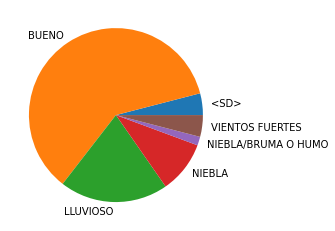

In [27]:
porcentajes=[5,75,25,12,2,5]
plt.pie(porcentajes, labels=["<SD>",'BUENO','LLUVIOSO','NIEBLA','NIEBLA/BRUMA O HUMO','VIENTOS FUERTES'])
plt.show()

C:\Users\camicha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fallecidos', ylabel='Density'>

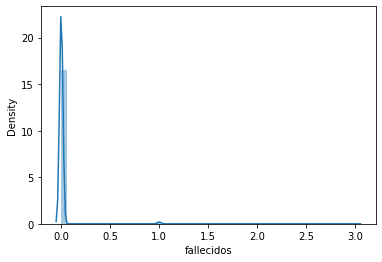

In [28]:
#Diagrama utilizado para ver como se comportan las distribuciones de los fallecidos
sns.distplot(data['fallecidos'])

C:\Users\camicha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hora', ylabel='Density'>

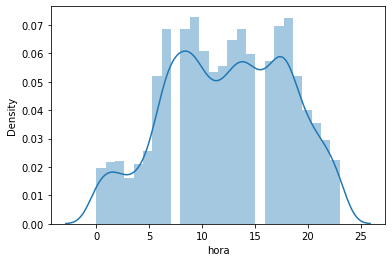

In [29]:
#Diagrama utilizado para ver como se comportan las distribuciones de las horas en las que ocurren los accidentes

sns.distplot(data['hora'])


C:\Users\camicha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fallecidos'>

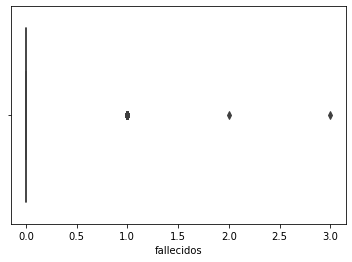

In [30]:
#Informacion sobre el mínimo, el primer cuartil, el medio, el tercer cuartil y los valores máximos de los fallecidos
sns.boxplot(data['fallecidos'])

<AxesSubplot:xlabel='bus', ylabel='Density'>

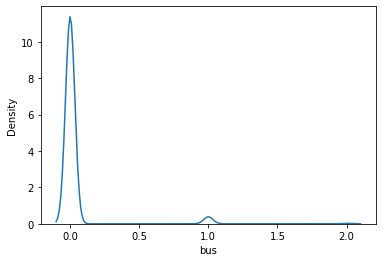

In [31]:
#Distribucion de los autobuses 
sns.kdeplot(df["bus"])

In [32]:
df_muertosClima = df[df['condiciones_meteorologicas'] == 'BUENO']
columnaX =df_muertosClima['hora']

C:\Users\camicha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


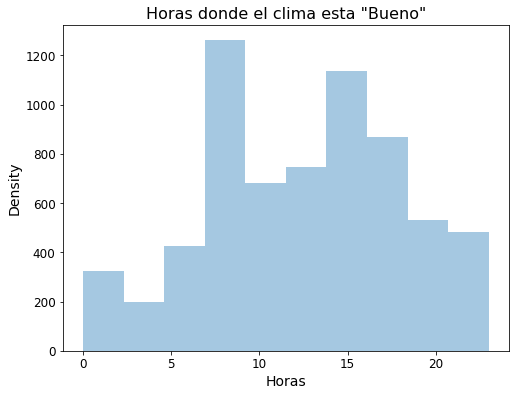

In [33]:
# Dependiendo del clima 
plt.figure(figsize=(8,6))
df_muertosClima = df_muertosClima[df_muertosClima['condiciones_meteorologicas'] == 'BUENO']
columnaX = df_muertosClima['hora']
# Crear la densidad
sns.distplot(columnaX, bins=10, kde=False)
plt.title('Horas donde el clima esta "Bueno"', fontsize=16)
plt.xlabel('Horas', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Density', fontsize=14)
plt.yticks(fontsize=12)
plt.show()

In [34]:
#Eleccion de metodo de feature selection


totalDeIncidentes=sum(data.lesionados)+sum(data.fallecidos)+sum(data.moto)+sum(data.liviano)+sum(data.bus)+sum(data.camion)
print(f'Hubo una totalidad de: {totalDeIncidentes} incidentes')


totalDeIncidentes2=data[['fallecidos','lesionados','moto','liviano','bus','camion']]
#totalDeIncidentes2=data.lesionados+data.fallecidos+data.moto+data.liviano+data.bus+data.camion
totalDeIncidentesPD=pd.DataFrame(totalDeIncidentes2)
totalDeIncidentesPD['totalDeIncidentes']=totalDeIncidentes
X=totalDeIncidentes2.drop("totalDeIncidentes", 1)    # feature matrix
y=totalDeIncidentes2['totalDeIncidentes']            # target feature
totalDeIncidentesPD.head()

Hubo una totalidad de: 17926 incidentes


C:\Users\camicha\AppData\Local\Temp\ipykernel_2036\239477646.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=totalDeIncidentes2.drop("totalDeIncidentes", 1)    # feature matrix


,fallecidos,lesionados,moto,liviano,bus,camion,totalDeIncidentes
0,0,1,0,1,0,0,17926
1,0,0,0,1,0,0,17926
2,0,8,0,2,0,0,17926
3,0,0,0,0,0,1,17926
4,0,1,0,2,0,0,17926


In [35]:
#Metodo para eliminar columna: Forward selection

def forward_selection(totalDeIncidentesPD, totalDeIncidentes, significance_level=0.01):
    initial_incidentes = totalDeIncidentesPD.columns.tolist()
    lst=list(initial_incidentes)
    best_incidentes = []
    while (len(lst)>0):
        remaining_incidentes = list(set(lst)-set(best_incidentes))
        new_pval = pd.Series(index=remaining_incidentes)
        for new_column in remaining_incidentes:
            model = sm.OLS(totalDeIncidentes.astype(float), sm.add_constant(totalDeIncidentesPD[best_incidentes+[new_column]]).astype(float)).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_incidentes.append(new_pval.idxmin())
        else:
            break
            
        
    return best_incidentes


    
forward_selection(X,y)





C:\Users\camicha\AppData\Local\Temp\ipykernel_2036\2243402145.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_incidentes)
C:\Users\camicha\AppData\Local\Temp\ipykernel_2036\2243402145.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_incidentes)
C:\Users\camicha\AppData\Local\Temp\ipykernel_2036\2243402145.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_incidentes)
C:\Users\camicha\AppData\Local\Temp\ipykernel_2036\2243402145.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a

['moto', 'liviano', 'lesionados', 'fallecidos']

In [36]:
#Modelo de regresion (Volstat)
df= data[['fallecidos','lesionados','moto','bus','liviano','camion']]


def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())
for col in df.columns:
  if col == 'moto':
    pass
  else:
    data[col] = min_max_scaling(data[col])
df.head()

,fallecidos,lesionados,moto,bus,liviano,camion
0,0,1,0,0,1,0
1,0,0,0,0,1,0
2,0,8,0,0,2,0
3,0,0,0,0,0,1
4,0,1,0,0,2,0


In [37]:
model1 = 'VolStat~fallecidos+ lesionados+ moto+ bus + liviano +camion'

#lm1 = sm.OLS(X,y).fit()
xdat=data['fallecidos']
ydat=data['lesionados']
model=sm.OLS(ydat,xdat).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:             lesionados   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              23.91
Date:                Sat, 26 Nov 2022   Prob (F-statistic):                    1.03e-06
Time:                        11:34:54   Log-Likelihood:                          11459.
No. Observations:                7579   AIC:                                 -2.292e+04
Df Residuals:                    7578   BIC:                                 -2.291e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [38]:
#Calculo de metricas

fallecidos_x=data[['fallecidos','lesionados']]
fallecidos_y=data[['fallecidos','moto']]
arr=fallecidos_y.to_numpy()
arr2=fallecidos_x.to_numpy()


X_train,X_test,y_train,y_test = train_test_split(arr,arr2)


#Calculo de MAE
print('MAE', mean_absolute_error(X_test,y_test))

MAE 0.1868450810403323


In [39]:
'''
El MAE me dio 0.18 (18%), este es el promedio de la diferencia absoluta entre el valor observado (el total de los fallecidos que se lesionaron) y los valores predichos(los que fallecieron andando en moto)
'''

'\nEl MAE me dio 0.18 (18%), este es el promedio de la diferencia absoluta entre el valor observado (el total de los fallecidos que se lesionaron) y los valores predichos(los que fallecieron andando en moto)\n'

In [40]:
#Conectandose a una API de inicidentes de trafico

import requests

url='https://api.open511.gov.bc.ca/events?limit=100'
data = requests.get(url)
if data.status_code==200:
    data = data.json()
    print(data)
    '''
    for e in data['drivebc.ca/DBC-21374']:
        print(e['title'])
    '''    

{'events': [{'jurisdiction_url': 'https://api.open511.gov.bc.ca/jurisdiction', 'url': 'https://api.open511.gov.bc.ca/events/drivebc.ca/DBCRCON-136315', 'id': 'drivebc.ca/DBCRCON-136315', 'headline': 'ROAD_CONDITION', 'status': 'ACTIVE', 'created': '2022-11-25T15:58:34-08:00', 'updated': '2022-11-26T05:00:27-08:00', 'description': 'Highway 16. Watch for slippery sections between Priestly Station Rd and Bowron River Rest Area for 250.7 km (Priestly Hill to Purden Lake). Last updated Sat Nov 26 at 5:00 AM PST. (DBCRCON-136315)', '+ivr_message': 'Highway 16. Watch for slippery sections between Priestly Station Rd and Bowron River Rest Area for 250.7 km (Priestly Hill to Purden Lake). Last updated Saturday, November 26 at 5:00 AM.', '+linear_reference_km': 831.15, 'schedule': {'intervals': ['2022-11-25T23:58/']}, 'event_type': 'ROAD_CONDITION', 'event_subtypes': ['PARTLY_ICY'], 'severity': 'MINOR', 'geography': {'type': 'LineString', 'coordinates': [[-125.350475, 54.122561], [-125.350222, 5

In [41]:
#Data Wrangling
#Reemplazo de valores nulos en la tabla

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,fallecidos,lesionados,moto,bus,liviano,camion
0,0,1,0,0,1,0
1,0,0,0,0,1,0
2,0,8,0,0,2,0
3,0,0,0,0,0,1
4,0,1,0,0,2,0


In [42]:
#Control de datos perdidos

missing_data = df.isnull()
missing_data.head(5)
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 
    


fallecidos
False    7579
Name: fallecidos, dtype: int64

lesionados
False    7579
Name: lesionados, dtype: int64

moto
False    7579
Name: moto, dtype: int64

bus
False    7579
Name: bus, dtype: int64

liviano
False    7579
Name: liviano, dtype: int64

camion
False    7579
Name: camion, dtype: int64



In [43]:
# Evaluando modelos de Machine Learning #

df.shape, data2.shape

((7579, 6), (5659, 3))

In [44]:
[x for x in df.columns if x not in data2.columns]

['fallecidos', 'lesionados', 'moto', 'bus', 'liviano', 'camion']

In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7579 entries, 0 to 7578
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   fallecidos  7579 non-null   int64
 1   lesionados  7579 non-null   int64
 2   moto        7579 non-null   int64
 3   bus         7579 non-null   int64
 4   liviano     7579 non-null   int64
 5   camion      7579 non-null   int64
dtypes: int64(6)
memory usage: 355.4 KB


In [46]:
# Función para extraer las columnas categóricas y las columnas numéricas en una lista separada para facilitar la EDA
def get_num_cat_cols(df):
    
    num_cls = [x for x in df.columns if df[x].dtype != 'object']
    cat_cls = [x for x in data2.columns if x not in num_cls]

    print(f'Numerical columns \n',num_cls)
    print(f'Categorical columns \n',cat_cls)
    
    return num_cls, cat_cls


In [47]:
num_cols, cat_cols = get_num_cat_cols(df)

Numerical columns 
 ['fallecidos', 'lesionados', 'moto', 'bus', 'liviano', 'camion']
Categorical columns 
 ['nro_caso', 'tItulo_caso', 'fecha']


In [48]:
df[num_cols].describe()

,fallecidos,lesionados,moto,bus,liviano,camion
count,7579.000000,7579.000000,7579.000000,7579.000000,7579.000000,7579.000000
mean,0.009500,0.586621,0.375643,0.037340,1.194881,0.161235
std,0.102306,0.956695,0.527365,0.201745,0.982236,0.433027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000
max,3.000000,21.000000,3.000000,2.000000,9.000000,4.000000


In [49]:
# Buscando los valores únicos con recuentos en variables categóricas y caracteres especiales para realizar la limpieza
for c in cat_cols:
    print('-'*100)
    print(f'Column Name - {c}')
    print('-'*100)
    print(data2[c].value_counts())


----------------------------------------------------------------------------------------------------
Column Name - nro_caso
----------------------------------------------------------------------------------------------------
C00126163    1
C00133540    1
C00135023    1
C00135022    1
C00135021    1
            ..
C00129902    1
C00129900    1
C00129898    1
C00129896    1
C00136958    1
Name: nro_caso, Length: 5659, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name - tItulo_caso
----------------------------------------------------------------------------------------------------
RECLAMOS/DAÑO DEL VEHICULO SOBRE AU./OBJETO                     583
RECLAMOS/VUELTO ERRONEO/DEVUELTO                                292
RECLAMOS/VUELTO ERRONEO/FALTANTE                                270
RECLAMOS/VUELTO ERRONEO/FALTANTE                                245
RECLAMOS/DAÑO DEL VEHICULO SOBRE AU./OBJETO                     237

In [50]:
# Mover las variables binarias en columnas numéricas a la lista de columnas categóricas, para EDA
cat_cols = cat_cols + [x for x in num_cols if 'RECLAMOS/DAÑO DEL VEHICULO SOBRE AU./OBJETO' in x]
print(cat_cols)
num_cols = [x for x in num_cols if x not in cat_cols]
print(num_cols)

['nro_caso', 'tItulo_caso', 'fecha']
['fallecidos', 'lesionados', 'moto', 'bus', 'liviano', 'camion']


<AxesSubplot:xlabel='lesionados', ylabel='liviano'>

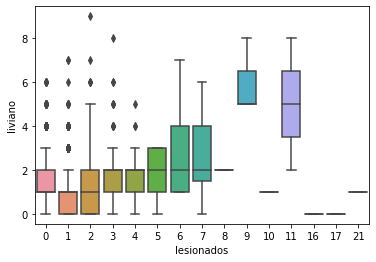

In [51]:
# Caracteristica - lesionados
sns.boxplot(x = df['lesionados'], y = df['liviano'])

<AxesSubplot:xlabel='liviano', ylabel='Count'>

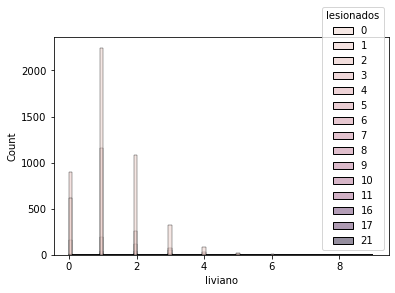

In [52]:
sns.histplot(x = df['liviano'], hue = df['lesionados'])